In [1]:
import h5py
import pywt
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [2]:
import get_ecg as ge
import read_ecg as re

C:\Users\gaspa\Desktop\P3A\ea_recherche\get_ecg.py:14: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(patient_id < 827, 'id of patient too high')


# Features list

mean : Mean value

std : Standard deviation

mad : Median absolute value

max	: Largest values in array

min : Smallest value in array

sma : Signal magnitude area

energy : Average sum of the squares

iqr : Interquartile range

entropy : Signal Entropy

arCoeff : Autorregresion coefficients

_________________________________________________

### To-do later : 

max amplitude : max - avg

correlation : Correlation coefficient

maxFreqInd : Largest frequency component

meanFreq : Frequency signal weighted average

skewness : Frequency signal Skewness

spectral kurtosis : Frequency signal Kurtosis

kurtosis : signal histogram kurtosis

energyBand : Energy of a frequency interval


# Individual features

In [3]:
#All functions below take the full 12-leads ecg tracings in numpy array format
#and generate a numpy array of size 12 with the feature calculated on each tracing.

#Average
def feature_avg(list_ecg):
    return np.mean(list_ecg,axis=1)

#Standard Deviation
def feature_std(list_ecg):
    return np.std(list_ecg,axis=1)

#Median Absolute Value (X) = median(|X-E(X)|), more robust to outliers than std
def feature_mad(list_ecg):
    return stats.median_abs_deviation(list_ecg,axis=1)

#Maximum and minimum
def feature_max(list_ecg):
    return np.amax(list_ecg,axis=1)

def feature_min(list_ecg):
    return np.amin(list_ecg,axis=1)

#Signal magnitude area = sum for a discrete signal
def feature_sma(list_ecg):
    return np.sum(list_ecg,axis=1)

#Energy = average sum of the squares
def feature_energy(list_ecg):
    return np.sum(list_ecg*list_ecg,axis=1)

#Interquartile range = the difference between 75th and 25th percentiles, aka between the upper and lower quartiles
def feature_iqr(list_ecg):
    q75, q25 = np.percentile(list_ecg, [75,25],axis=1)
    return q75-q25

#Entropy = Shannon entropy of the value histogram of the signal = sum_p -p log(p)
def feature_entropy(list_ecg,numbins=100,base=None): 
    #numbins : number of bins to use for the histogram
    #base : base of the log for entropy calculation 
    return np.array([stats.entropy(stats.relfreq(list_ecg[k],numbins).frequency,None,base) for k in range(np.shape(list_ecg)[0])])

#Spectral entropy ? = Shannon entropy of the value histogram of the frequency spectrum 

#Auto_correlation : correlation between the signal and itself offsetted by 'lag'.
def feature_auto_correlation(list_ecg,lag):
    return np.array(np.correlate(list_ecg[k],list_ecg[k], "same")[lag] for k in range(np.shape(list_ecg)[0]))

In [44]:
gogo = str(feature_avg)[10:]
print(gogo)
i = 0
while gogo[i]!=" ":
    i+=1
print(i)
gogo = gogo[:i]
print(gogo)

feature_avg at 0x000001959C46FAF0>
11
feature_avg


# Tests

(12, 4000)


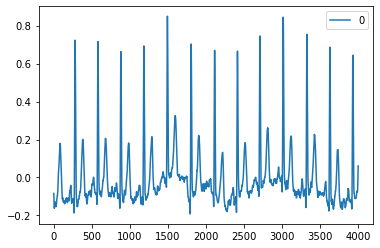

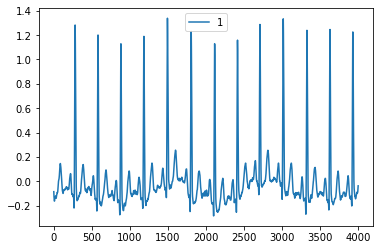

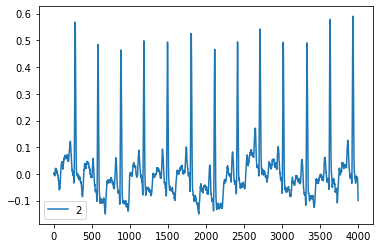

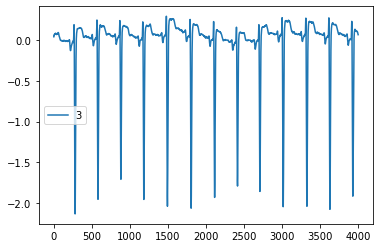

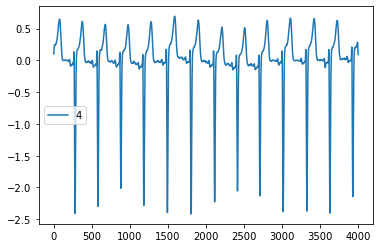

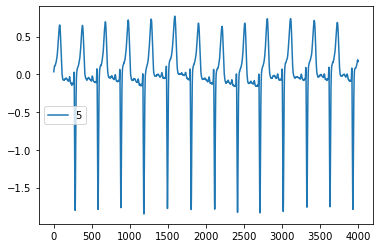

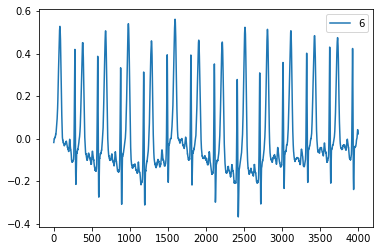

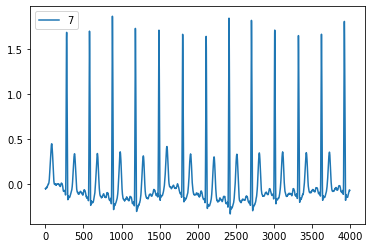

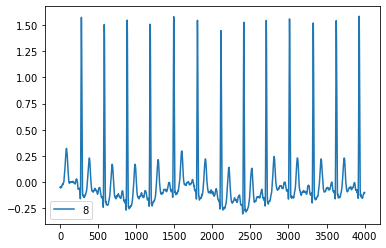

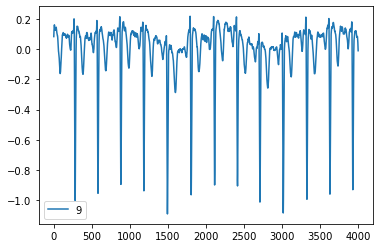

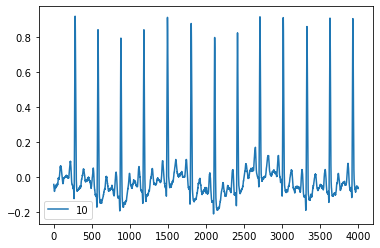

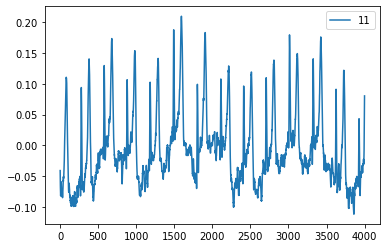

In [18]:
temp=ge.get_ecg(patient_id=10)
ecg_example= np.array([re.delete_zeros(temp[k]) for k in range(12)])

print(np.shape(ecg_example))

for k in range(12):
    plt.plot(ecg_example[k],label=str(k))
    plt.legend()
    plt.show()

Shape of example ecg : (12, 4000)
Energy of test = [230  14   2]
Energy of ecg_example = [ 99.63507156 233.63684086  46.79514456 550.90400051 920.47563513
 698.24451198 132.50851068 437.37037766 343.50612097 153.78761392
 114.42551249  14.44961916]
IQR of test = [1.5 1.5 0.5]
IQR of ecg_example = [0.10040913 0.13766091 0.08400004 0.11986633 0.24994205 0.23454571
 0.14407942 0.14679133 0.1353905  0.11726319 0.09019439 0.06001341]
Entropy of test = [2.  2.  1.5]
Entropy of ecg example = [8.17167929 7.95150811 8.34764055 7.1487931  7.74411735 8.07183593
 8.64813114 7.76404126 7.80852269 8.01751991 7.94432101 8.98024783]


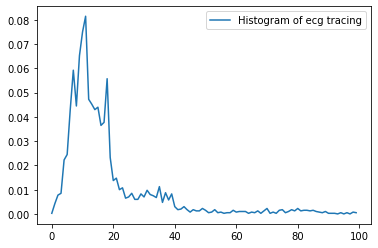

entropy=3.5586534312824365
Autocorrelation of test for lag = 1 : <generator object feature_auto_correlation.<locals>.<genexpr> at 0x00000189003C96D0>
Autocorrelation of ecg example for lag =1 : <generator object feature_auto_correlation.<locals>.<genexpr> at 0x00000189003C96D0>


In [10]:
avg = feature_avg(ecg_example)
std = feature_std(ecg_example)
mad = feature_mad(ecg_example)
maxi = feature_max(ecg_example)
mini = feature_min(ecg_example)
sma = feature_sma(ecg_example)
energy = feature_energy(ecg_example)
iqr = feature_iqr(ecg_example)
entropy = feature_entropy(ecg_example)

print('Shape of example ecg : '+str(np.shape(ecg_example)))
test = np.array([[6,7,8,9],[0,1,2,3],[-1,0,0,1]])

print('Energy of test = '+str(feature_energy(test)))
print('Energy of ecg_example = '+str(feature_energy(ecg_example)))


print('IQR of test = '+str(feature_iqr(test)))
print('IQR of ecg_example = '+str(feature_iqr(ecg_example)))


print('Entropy of test = ' + str(feature_entropy(test,base=2)))
print('Entropy of ecg example = ' + str(feature_entropy(ecg_example,numbins=1000,base=2)))


histo = stats.relfreq(ecg_example[0],numbins=100).frequency
plt.plot(histo,label='Histogram of ecg tracing')
plt.legend()
plt.show()
print('entropy='+str(stats.entropy(histo)))


print('Autocorrelation of test for lag = 1 : ' + str(feature_auto_correlation(test,1)))
print('Autocorrelation of ecg example for lag =1 : ' + str(feature_auto_correlation(ecg_example,1)))


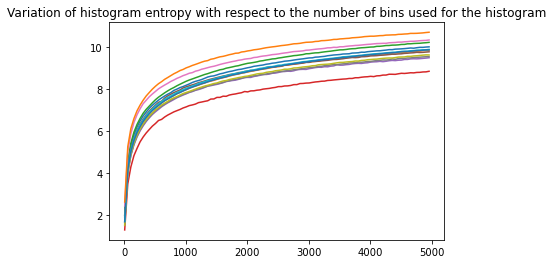

In [7]:
X = np.arange(10,5000,step=50)
Y = np.array([feature_entropy(ecg_example,numbins=k,base=2) for k in X])
plt.plot(X,Y)
plt.title('Variation of histogram entropy with respect to the number of bins used for the histogram')
#plt.legend()
plt.show()

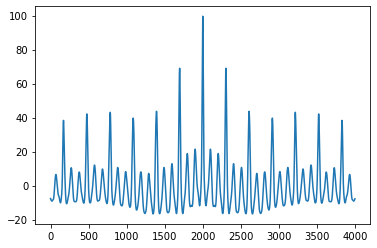

In [9]:
X = np.arange(np.shape(ecg_example)[1])
Y = np.correlate(ecg_example[0],ecg_example[0],"same")
plt.plot(X,Y)
plt.show()